Исследуемые функции:

In [60]:
import numpy as np

def f1(x):
    return np.sin(x * x)

def f2(x):
    return np.cos(np.sin(x))

def f3(x):
    return np.exp(np.sin(np.cos(x)))

def f4(x):
    return np.log(x + 3)

def f5(x):
    return (x + 3) ** (1 / 2)

Их производные, вычисленные аналитически:

In [61]:
def df1(x):
    return np.cos(x * x) * 2 * x

def df2(x):
    return -np.sin(np.sin(x)) * np.cos(x)

def df3(x):
    return np.exp(np.sin(np.cos(x))) * np.cos(np.cos(x)) * np.sin(x) * (-1)

def df4(x):
    return 1 / (x + 3)

def df5(x):
    return 1 / 2 * (x + 3) ** (-1 / 2)

Формулы для численного дифференцирования:

In [62]:
def d1(f, x, h):
    return (f(x + h) - f(x)) / h

def d2(f, x, h):
    return (f(x) - f(x - h)) / h

def d3(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def d_handler1(f, x, h):
    return (f(x + 2 * h) - f(x - 2 * h)) / (4 * h)

def d4(f, x, h):
    return (4 / 3) * d3(f, x, h) - (1 / 3) * d_handler1(f, x, h)

def d_handler2(f, x, h):
    return (f(x + 3 * h) - f(x - 3 * h)) / (6 * h)

def d5(f, x, h):
    return (3 / 2) * d3(f, x, h) - (3 / 5) * d_handler1(f, x, h) + (1 / 10) * d_handler2(f, x, h)

Набор значений h:

In [63]:
def h_param():
    ar = np.zeros(21)
    ar[0] = 1
    for i in range(20):
        ar[i + 1] = ar[i] / 2
    return ar

Абсолютная погрешность численного дифференцирования:

In [71]:
def abs_er(func, f_dif, num_dif, x, h):
    return abs(num_dif(func, x, h) - f_dif(x))

Вычисление результатов:

In [72]:
def f_all_abs_ers(func, f_dif, x, h):
    return np.array([abs_er(func, f_dif, d1, x, h),
                     abs_er(func, f_dif, d2, x, h),
                     abs_er(func, f_dif, d3, x, h),
                     abs_er(func, f_dif, d4, x, h),
                     abs_er(func, f_dif, d5, x, h)])

def all_f_all_abs_ers(x, h):
    return np.array([f_all_abs_ers(f1, df1, x, h),
                     f_all_abs_ers(f2, df2, x, h),
                     f_all_abs_ers(f3, df3, x, h),
                     f_all_abs_ers(f4, df4, x, h),
                     f_all_abs_ers(f5, df5, x, h)])

Визуализация результатов:

In [76]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

<ipython-input-80-58d7759c1f41>:7: RuntimeWarning: divide by zero encountered in log2
  return handler(arr)


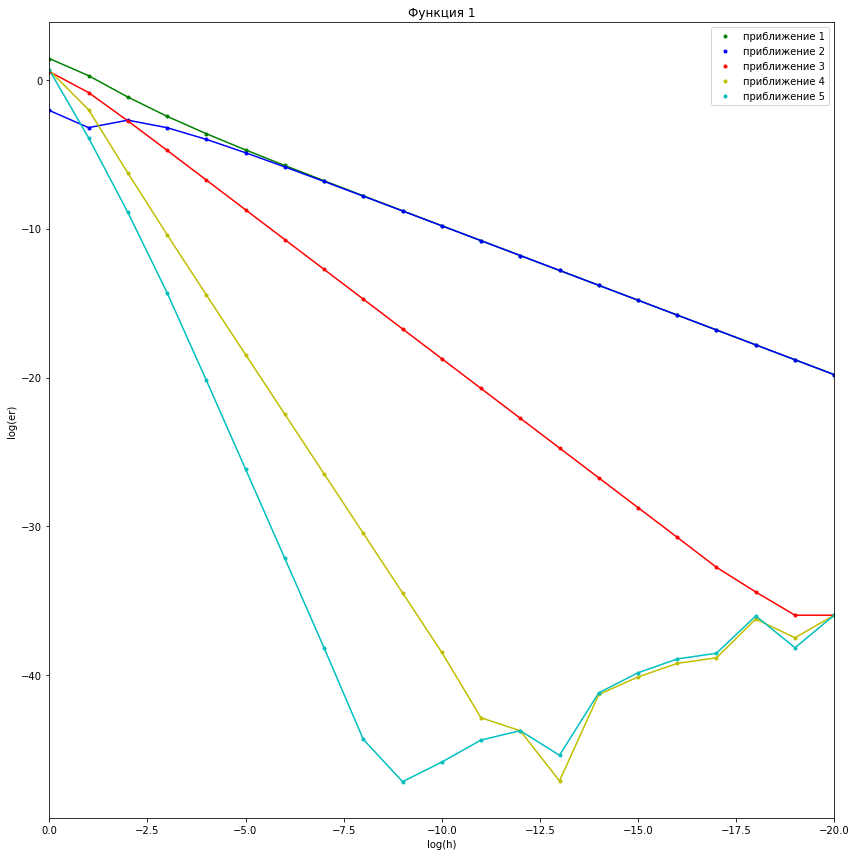

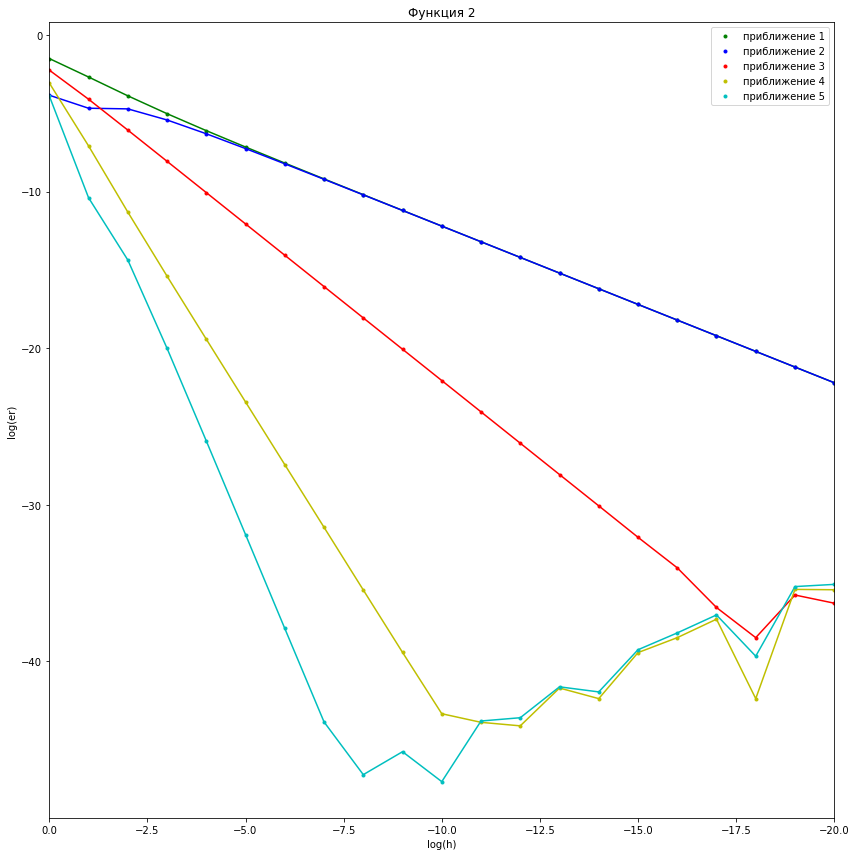

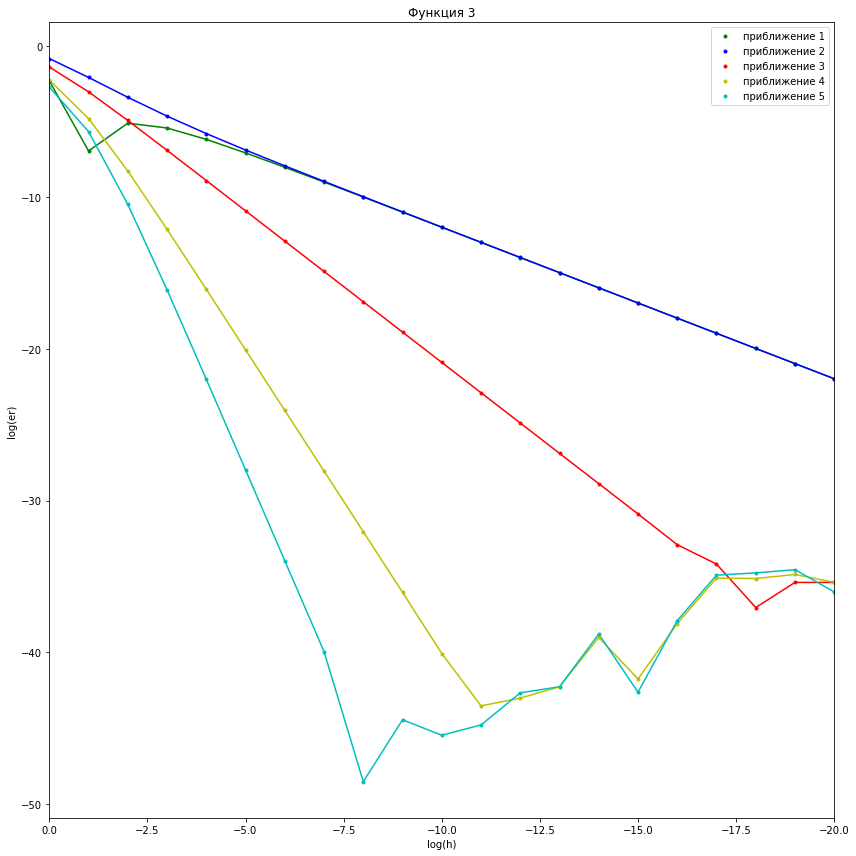

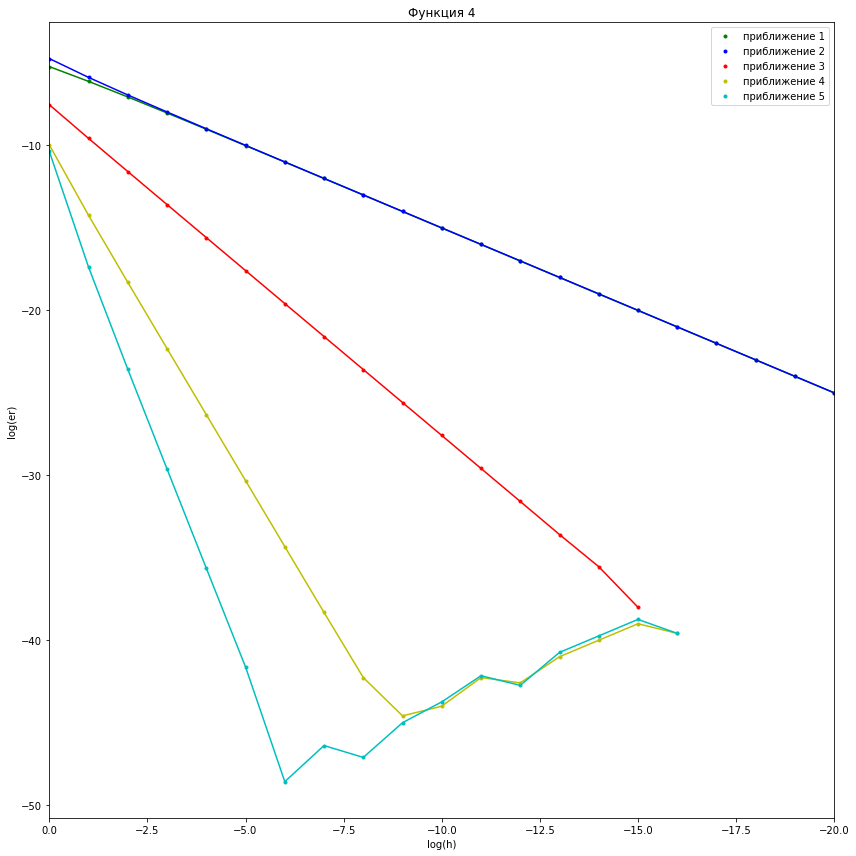

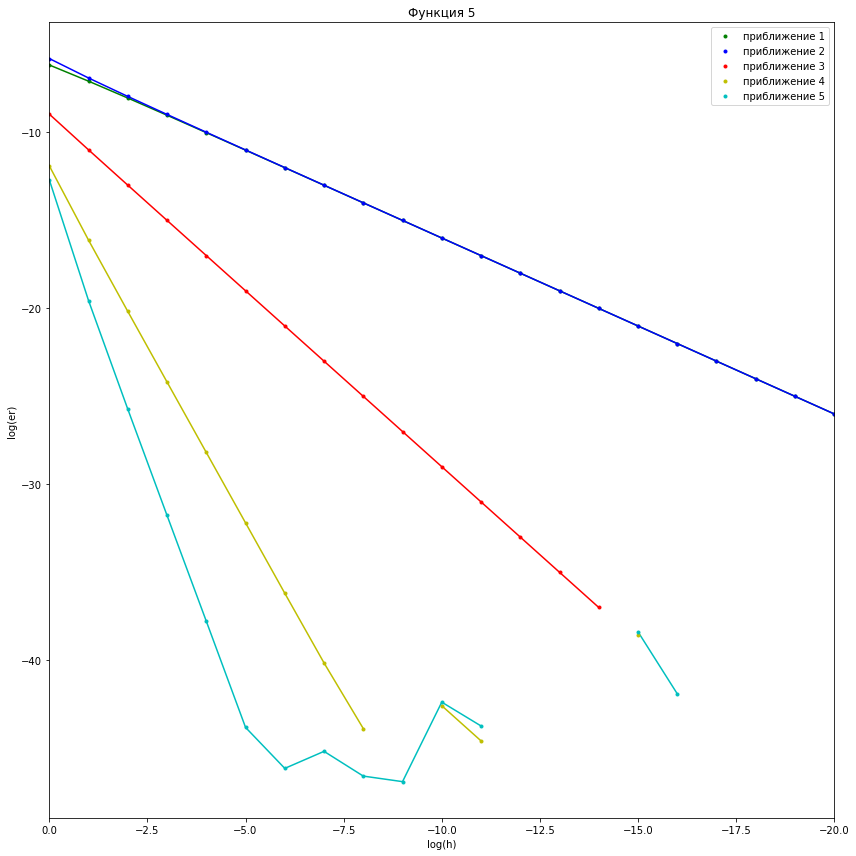

In [80]:
import matplotlib.pyplot as plt

h = h_param()
abs_ers = all_f_all_abs_ers(x = 1, h = h)

def map(handler, arr):
    return handler(arr)

h = map(np.log2, h)
abs_ers = map(np.log2, abs_ers)

def build_f_ers(num):
    plt.figure(figsize=[12, 12])
    plt.plot(h, abs_ers[num][0], 'g')
    plt.plot(h, abs_ers[num][1], 'b')
    plt.plot(h, abs_ers[num][2], 'r')
    plt.plot(h, abs_ers[num][3], 'y')
    plt.plot(h, abs_ers[num][4], 'c')
    plt.plot(h, abs_ers[num][0], 'g.', label='приближение 1')
    plt.plot(h, abs_ers[num][1], 'b.', label='приближение 2')
    plt.plot(h, abs_ers[num][2], 'r.', label='приближение 3')
    plt.plot(h, abs_ers[num][3], 'y.', label='приближение 4')
    plt.plot(h, abs_ers[num][4], 'c.', label='приближение 5')
    plt.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.xlim(h[0], h[h.size - 1])
    plt.xlabel("log(h)")
    plt.ylabel("log(er)")
    plt.title("Функция " + str(num + 1))
    plt.tight_layout() 
    plt.show()
    
build_f_ers(0)
build_f_ers(1)
build_f_ers(2)
build_f_ers(3)
build_f_ers(4)